In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fftIndgen(n):
    a = list(range(0, int(n/2+1)))
    b = list(range(1, int(n/2)))
    b.reverse()
    b = [-i for i in b]
    return a + b

def gaussian_random_field(Pk = lambda k : k**-3.0, size = 100):
    def Pk2(kx, ky):
        if kx == 0 and ky == 0:
            return 0.0
        return np.sqrt(Pk(np.sqrt(kx**2 + ky**2)))
    noise = np.fft.fft2(np.random.normal(size = (size, size)))
    amplitude = np.zeros((size,size))
    for i, kx in enumerate(fftIndgen(size)):
        for j, ky in enumerate(fftIndgen(size)):            
            amplitude[i, j] = Pk2(kx, ky)
    return np.fft.ifft2(noise * amplitude).real

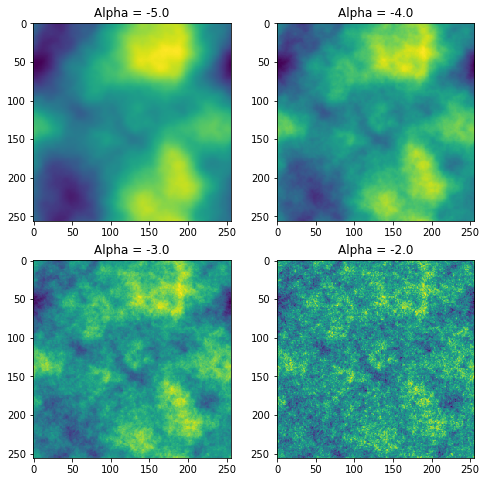

In [3]:
w = h = 10
fig = plt.figure(figsize=(8, 8))
columns = rows = 2
alphas = [-5.0, -4.0, -3.0, -2.0]
for i in range(1, columns*rows +1):
    alpha = alphas[i-1]
    np.random.seed(1)
    y1 = gaussian_random_field(Pk = lambda k: k**alpha, size=256)
    fig.add_subplot(rows, columns, i)
    plt.imshow(y1)
    plt.title('Alpha = '+str(alpha))
plt.show()